# **Project: Purchase Intention Prediction + Behavior Analysis**
**Author:** Athira P

---

## 1. Project Aim
To build a machine learning model that predicts whether an online visitor will make a purchase (Revenue = True) on an e-commerce website.

---

## 2. Objective
The goal is to analyze visitor behavior and session data to identify key factors influencing purchase decisions. By understanding visitor interactions, duration, traffic type, and demographics, this model can help e-commerce platforms optimize their marketing strategies and website experience to increase conversions.

---

## 3. Process

This notebook performs the following steps to predict customer purchase intention:

1. Install & Import Libraries:
Set up all required Python libraries such as pandas, numpy, seaborn, matplotlib, scikit-learn, imblearn, lightgbm, and xgboost.

2. Load & Preprocess Data:
Load the Online Shoppers Intention Dataset. Perform data cleaning including:

* Handling missing values

* Detecting and correcting skewness in numerical features using log/sqrt and Yeo-Johnson transformations

* Handling outliers using the Z-score method

* Encoding categorical variables and scaling numerical features

* Selecting relevant features for modeling

3. Train-Test Split & Imbalance Handling:
Split the dataset into training and testing sets (80/20). Handle class imbalance on the training set using SMOTE to balance the target variable.

4. Model Training & Evaluation:
Train multiple machine learning models including Logistic Regression, Random Forest, and LightGBM. Evaluate their performance on the test set using metrics such as Accuracy, Precision, Recall, F1-Score, Confusion Matrix, and ROC-AUC.

5. Feature Importance & Insights:
Analyze the best-performing model using feature importance plots to identify the most influential features affecting purchase intention. Generate actionable insights from model predictions.

6. Final Predicted Customers:
Use the trained model to predict customers with a high likelihood of purchase intention. Automatically generate a summary table, distribution plot, and save the predicted customers list to CSV for reporting or business decisions.



STEP 1: IMPORT LIBRARIES

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

STEP 2 — IMPORT DATASET

In [71]:
from google.colab import files
uploaded = files.upload()

Saving Online purchase.csv to Online purchase (3).csv


In [72]:
import pandas as pd
df = pd.read_csv('Online purchase.csv')
print(" Dataset Loaded Successfully!✅")
print(f"Shape of the data: {df.shape}")
df.head()

 Dataset Loaded Successfully!✅
Shape of the data: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


STEP 2.1 — Basic Dataset Information

info() helps us understand the data types and missing values.

describe() gives statistical summaries for numerical and categorical variables. Together, these help us identify the nature of the dataset and potential preprocessing steps.

In [73]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  

STEP 2.2- Checking Duplicates

In [74]:
df.duplicated().sum()

np.int64(125)

STEP 2.3-Removing Duplicates

In [75]:
df = df.drop_duplicates()
df.shape

(12205, 18)

Shape of the data (before): (12330, 18)

Shape of the data (after): (12205, 18)

**STEP 3 — Finding Missing Values**

Missing values can affect model performance. isnull().sum(), we check for missing values and decide whether to fill or drop them.

In [76]:
print("\n--- Missing or Null Values ---")
print(df.isnull().sum())


--- Missing or Null Values ---
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


This dataset usually contains no missing values—but verifying is essential.

STEP 4 — Understanding Feature Types & Separate Numerical & Categorical Columns

Separating numerical and categorical features is important because the preprocessing steps for each type are different.


*   Numerical features → scaling, outlier detection
*   Categorical features → encoding






In [77]:
numerical_cols = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
    'OperatingSystems', 'Browser', 'Region', 'TrafficType'
]

categorical_cols = ['Month', 'VisitorType', 'Weekend']
target = 'Revenue'

STEP 4.1 -Categorical Data Analysis

/tmp/ipython-input-581709658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="pastel")


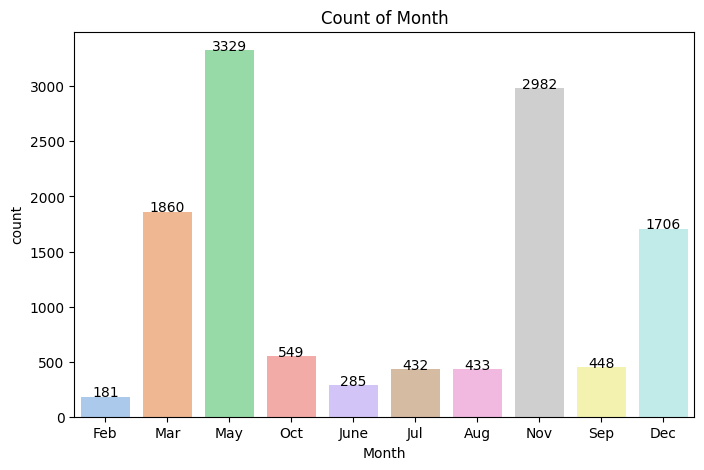


Month distribution (percentages):
Month
May     27.28
Nov     24.43
Mar     15.24
Dec     13.98
Oct      4.50
Sep      3.67
Aug      3.55
Jul      3.54
June     2.34
Feb      1.48
Name: proportion, dtype: float64
--------------------------------------------------


/tmp/ipython-input-581709658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="pastel")


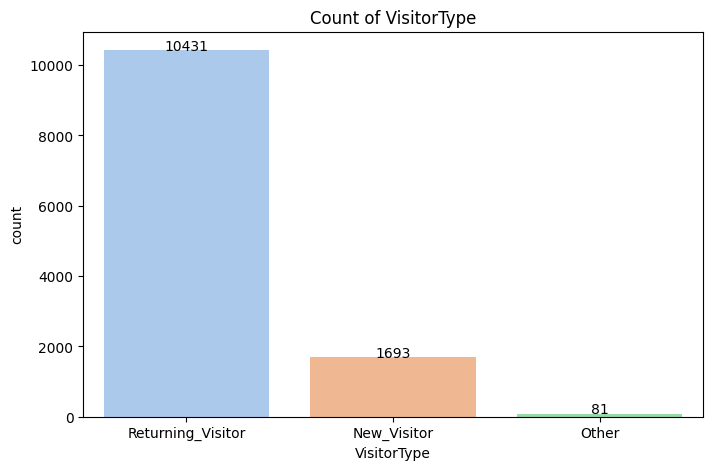


VisitorType distribution (percentages):
VisitorType
Returning_Visitor    85.46
New_Visitor          13.87
Other                 0.66
Name: proportion, dtype: float64
--------------------------------------------------


/tmp/ipython-input-581709658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="pastel")


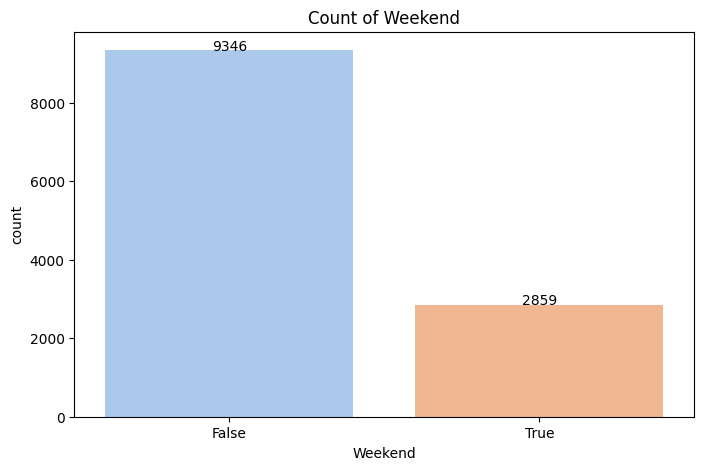


Weekend distribution (percentages):
Weekend
False    76.58
True     23.42
Name: proportion, dtype: float64
--------------------------------------------------


In [78]:
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=col, data=df, palette="pastel")

    # Add value labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width()/2,
                y=height + 0.5,
                s=int(height),
                ha='center')

    plt.title(f"Count of {col}")
    plt.show()

    # Print percentages
    print(f"\n{col} distribution (percentages):")
    print(round(df[col].value_counts(normalize=True) * 100, 2))
    print("-"*50)

Categorical Feature Distribution Summary

*Weekend*

Most sessions (76.58%) occurred on weekdays, while 23.42% occurred on weekends.

This suggests that user behavior may vary by day of the week, and the model could capture this pattern.

*VisitorType*

A vast majority of users (85.46%) are Returning Visitors, 13.87% are New Visitors, and a very small portion (0.66%) is labeled as Other.

This indicates that purchase intention is likely influenced by prior site familiarity and returning users dominate the dataset.

*Month*

The dataset has seasonal trends in session counts:

May (27.28%) and November (24.43%) have the highest traffic.

Months like February (1.48%), June (2.34%), and July (3.54%) have much lower traffic.

This can indicate that marketing campaigns, promotions, or seasonal shopping patterns may influence user behavior.

STEP 4.2- Numerical Data Analysis

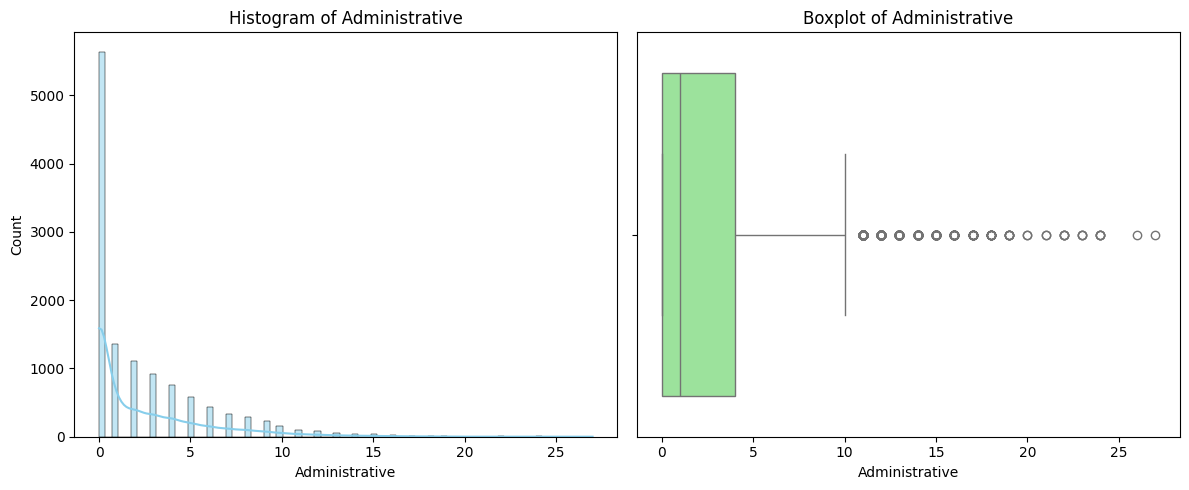

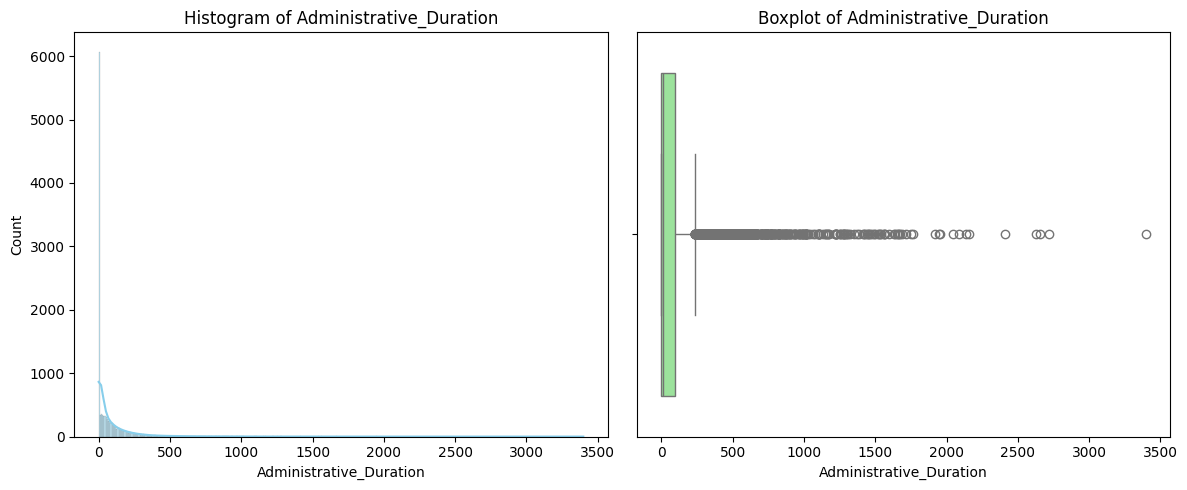

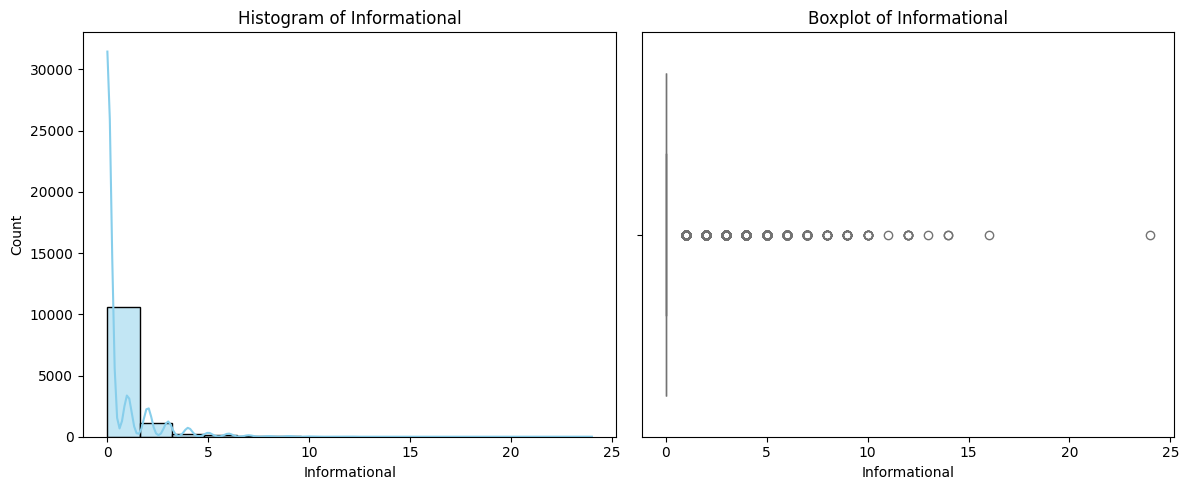

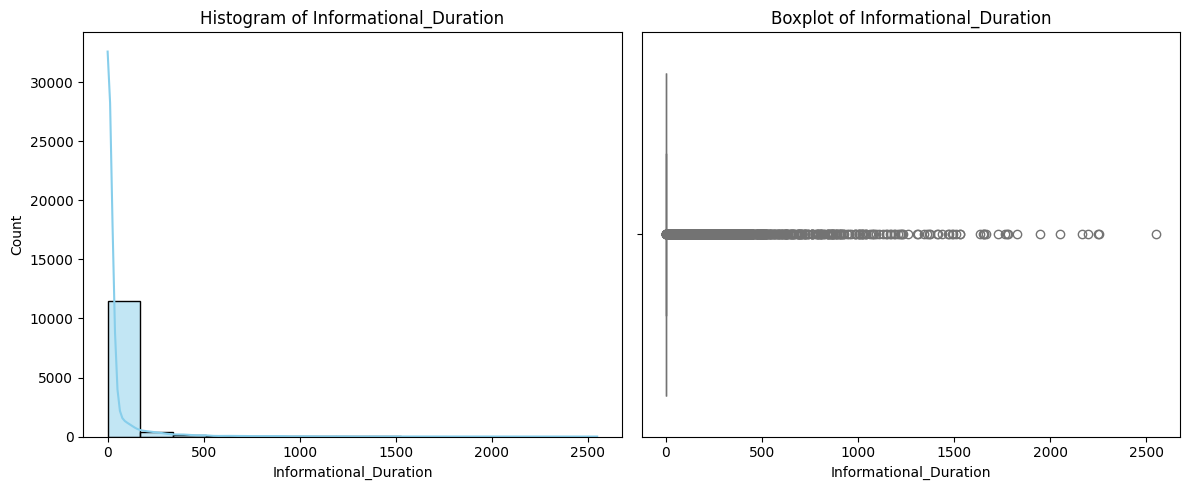

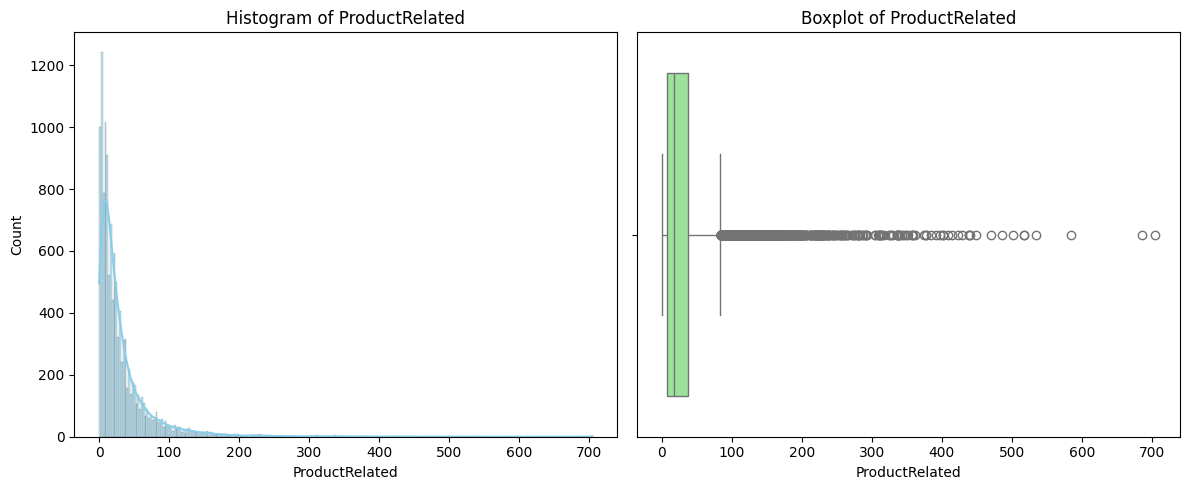

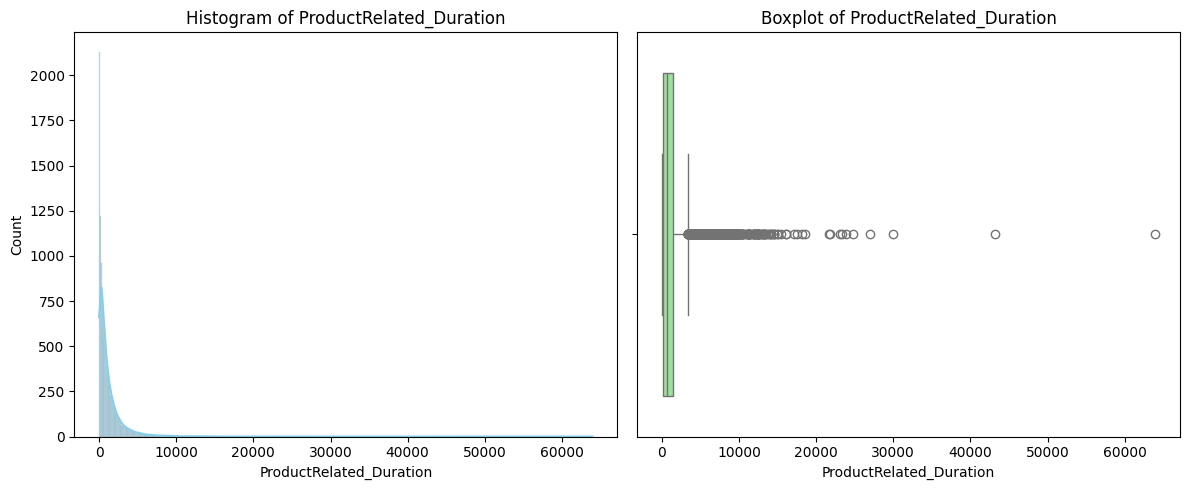

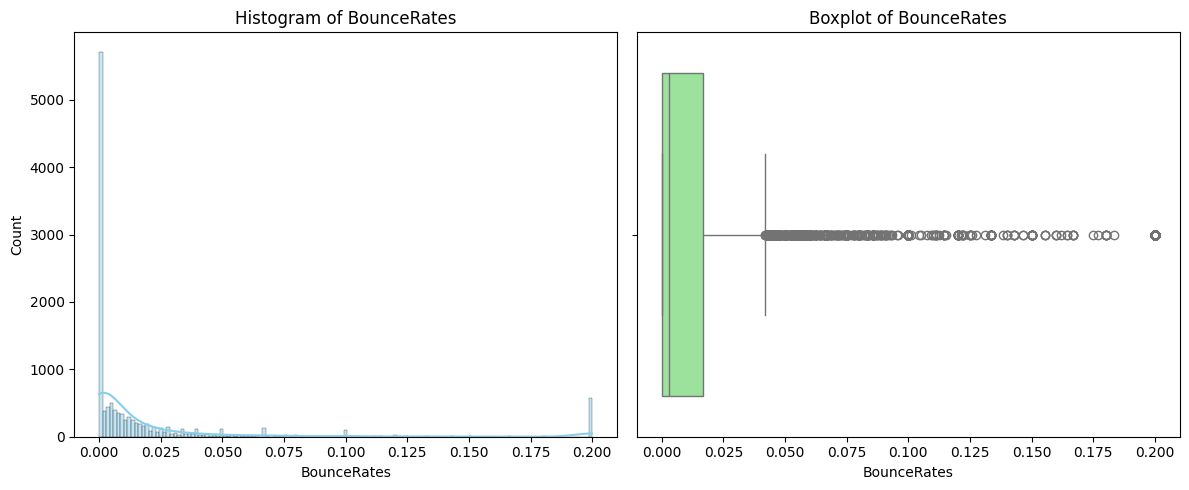

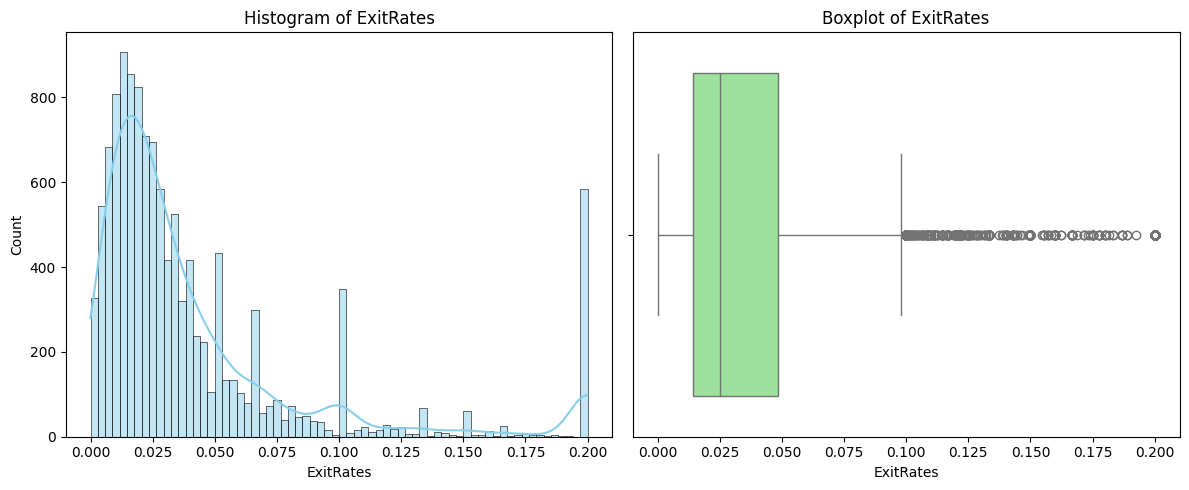

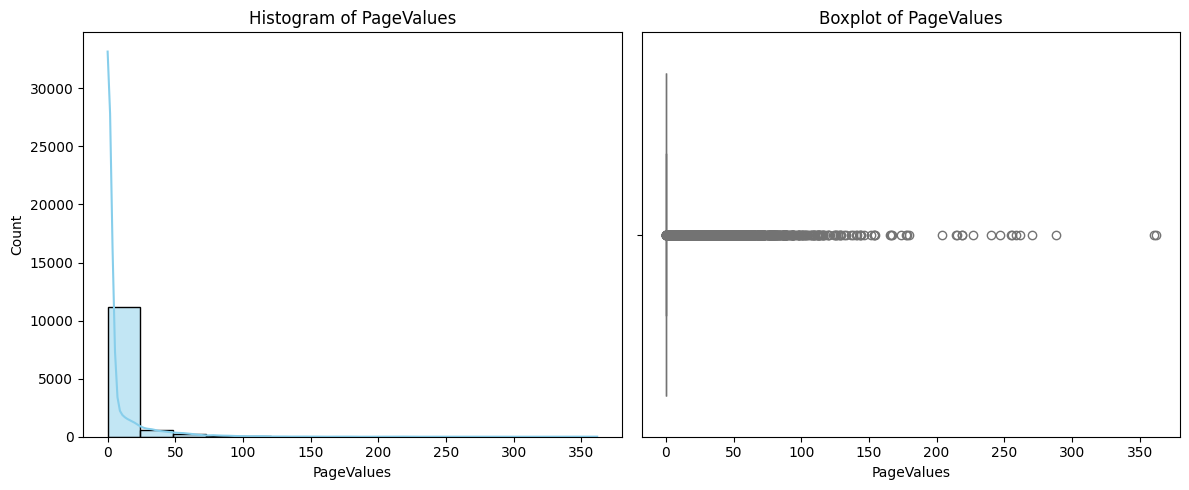

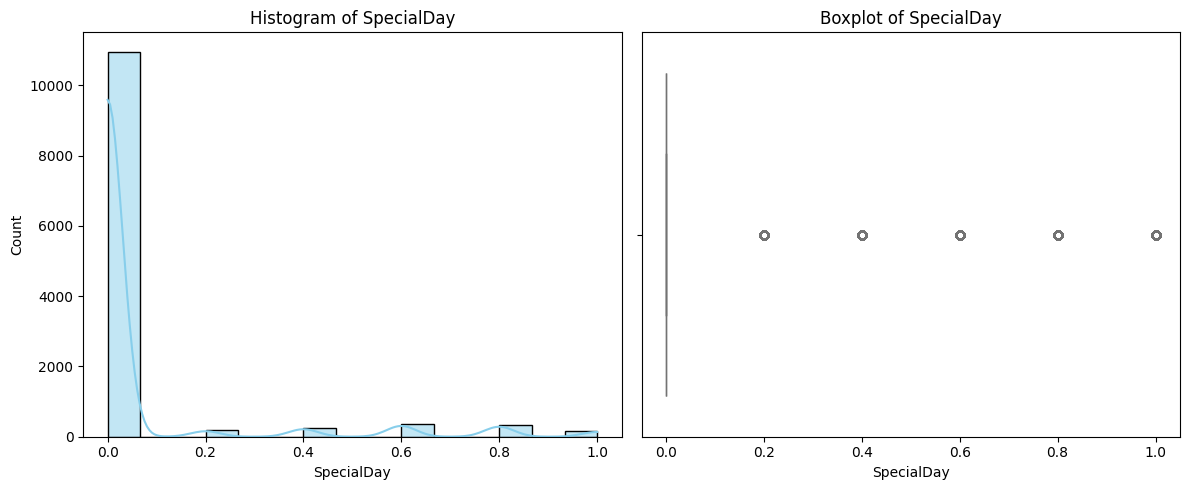

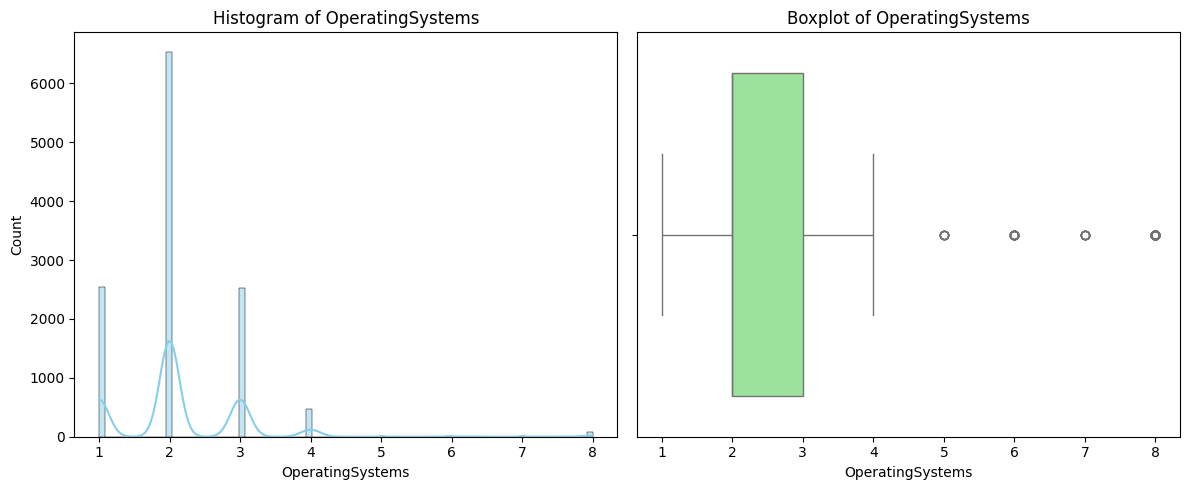

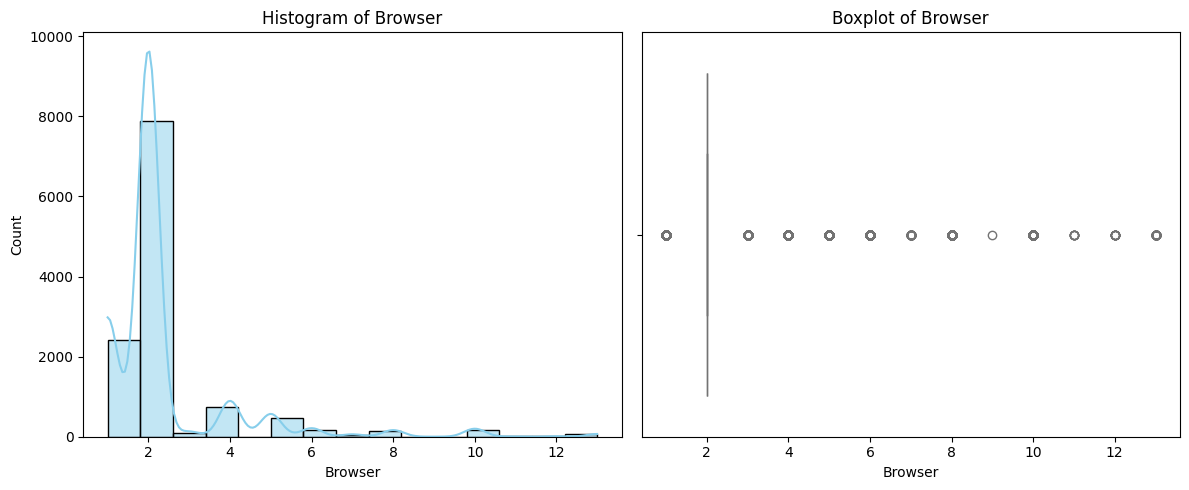

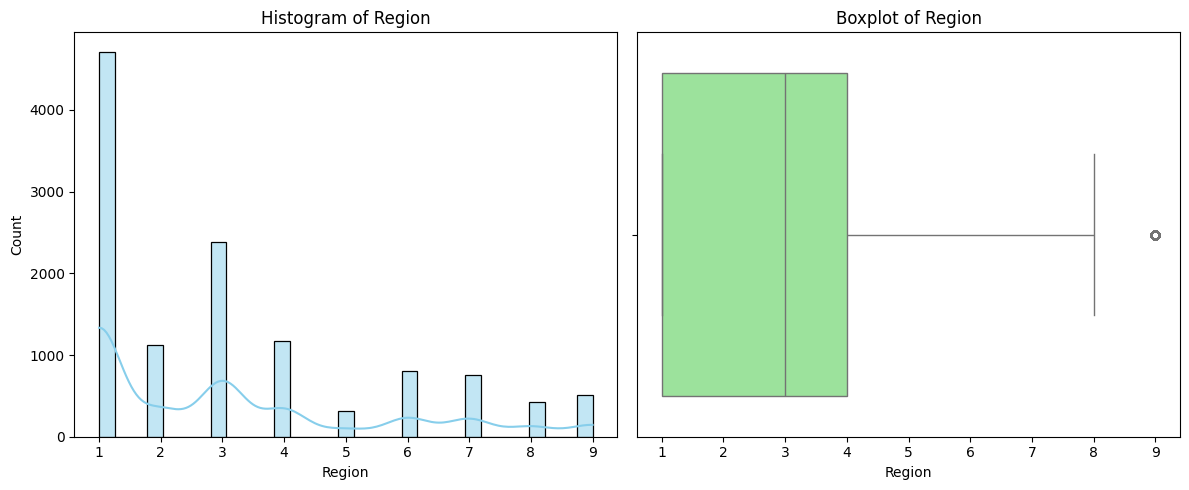

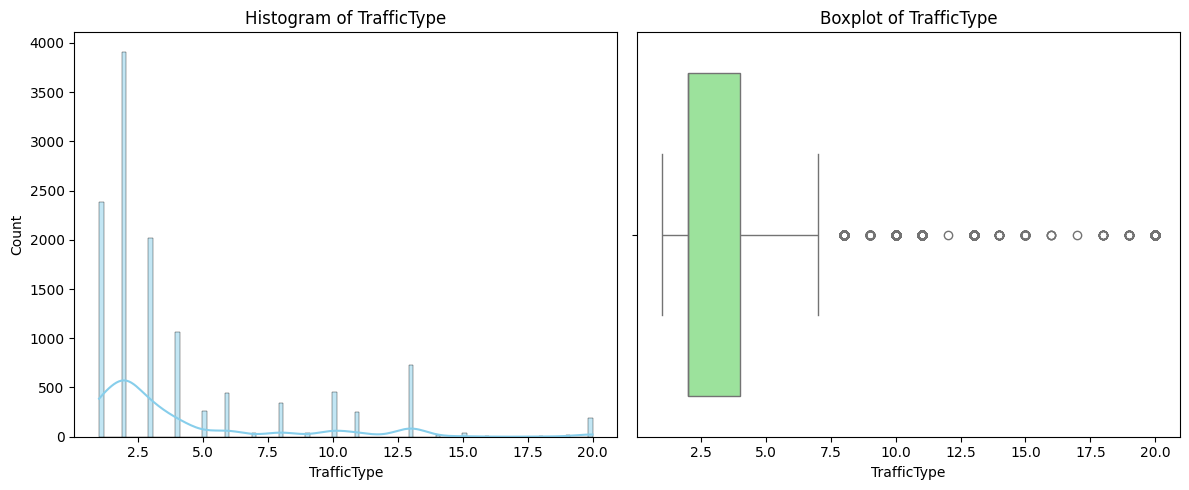

In [79]:
for col in numerical_cols:
    plt.figure(figsize=(12,5))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

STEP 4.3- Heatmap of Feature Correlations

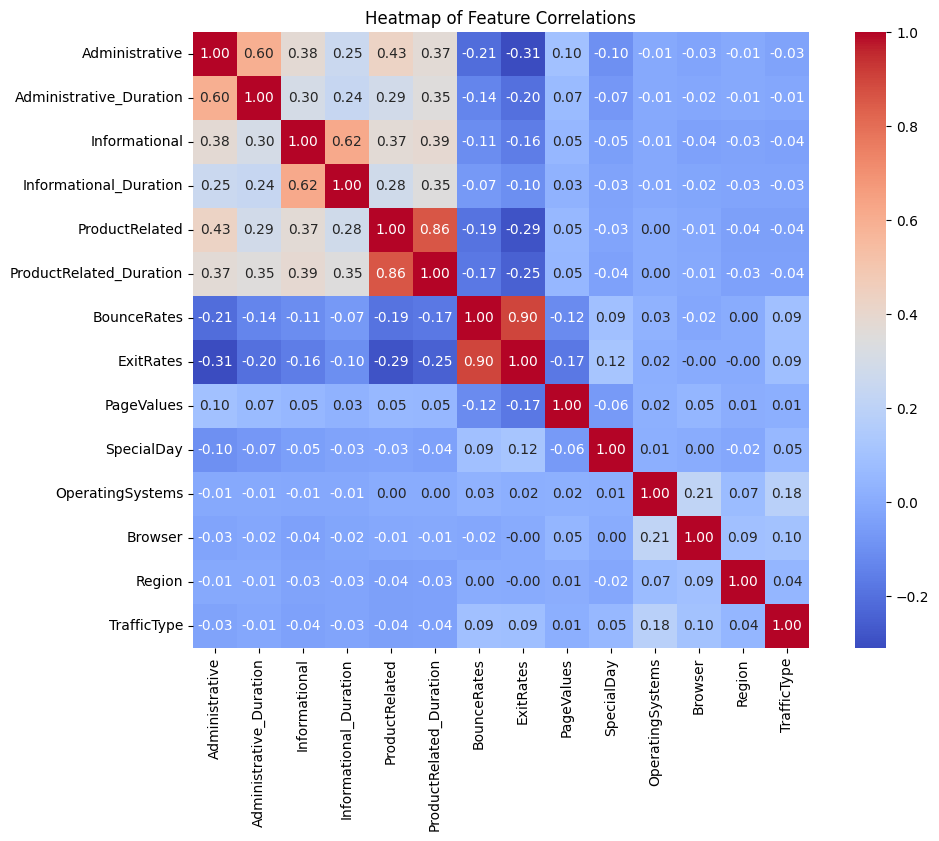

In [80]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap of Feature Correlations")
plt.show()



The heatmap visualizes the pairwise correlations between numerical features in the dataset.  

- Features like **Administrative** and **Administrative_Duration**, **ProductRelated** and **ProductRelated_Duration** show **strong positive correlations**,  
  indicating that **longer durations spent on administrative or product-related pages are associated with more page interactions**.  

- Moderate correlations can also be observed between **BounceRates** and **ExitRates**, suggesting that pages with high exit rates also tend to have higher bounce rates.  

- Understanding these relationships helps in feature selection and in interpreting model predictions later, especially when combined with SHAP explainability.


STEP 5- Check Skewness of Numerical Columns

Initial skewness of numerical columns:
Informational_Duration     7.540291
ProductRelated_Duration    7.253161
PageValues                 6.350983
Administrative_Duration    5.592152
ProductRelated             4.333419
Informational              4.014173
SpecialDay                 3.285902
Browser                    3.217404
BounceRates                3.162425
ExitRates                  2.234645
OperatingSystems           2.032613
TrafficType                1.958514
Administrative             1.947123
Region                     0.978480
dtype: float64


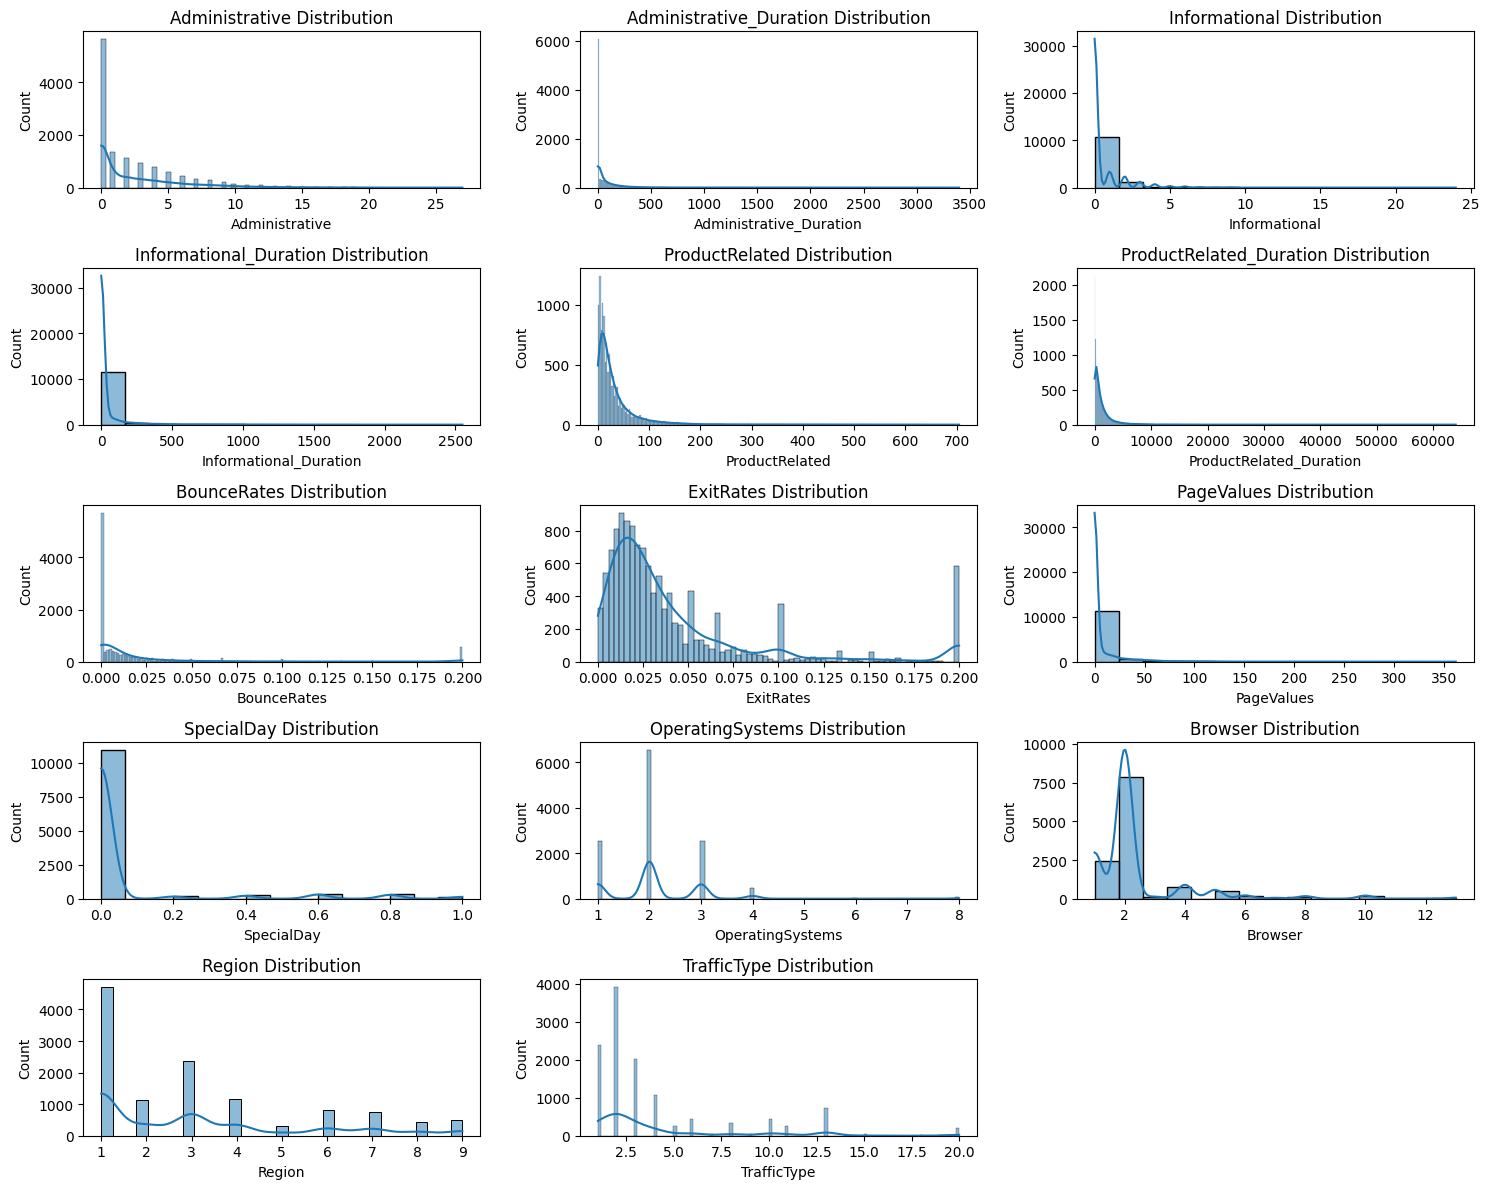

In [83]:
from sklearn.preprocessing import PowerTransformer

# -----------------------------
# 1️⃣ Skewness Table
# -----------------------------
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print("Initial skewness of numerical columns:")
skew_values = df[numerical_cols].skew().sort_values(ascending=False)
print(skew_values)

# -----------------------------
# 2️⃣ Plot original distributions
# -----------------------------
plt.figure(figsize=(15,12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


Conclusion: Almost all numerical features are right-skewed > 1

This means that most visitors have low values for metrics such as page duration, bounce rate, exit rate, etc., while a smaller group has very high browsing activity. These long right-tailed distributions can negatively affect machine learning model performance.

➡️ So transform or handle skewness


STEP 5.1-Transformation using (log/sqrt)

In [84]:
# 3️⃣ Apply log1p / sqrt for positive or zero-adjustable columns
# -----------------------------
df_transformed = df.copy()
for col in numerical_cols:
    if df[col].min() > 0:
        # Positive-only → log1p
        df_transformed[col] = np.log1p(df[col])
    else:
        # Zero or negative → sqrt after shifting
        df_transformed[col] = np.sqrt(df[col] - df[col].min() + 1)

print("\nSkewness after log/sqrt transformation:")
print(df_transformed[numerical_cols].skew().sort_values(ascending=False))



Skewness after log/sqrt transformation:
Informational_Duration     3.620072
SpecialDay                 3.189145
BounceRates                3.120497
PageValues                 2.869148
Informational              2.616479
ExitRates                  2.182418
Administrative_Duration    1.693544
ProductRelated             1.592020
Browser                    1.532989
ProductRelated_Duration    1.437013
Administrative             1.095986
TrafficType                0.904720
Region                     0.369230
OperatingSystems           0.274592
dtype: float64


STEP 5.2- Fix Skewness using yeo jhonson transformations

In [85]:
# 4️⃣ Apply Yeo–Johnson for remaining skewed columns (|skew| > 0.75)
# -----------------------------
remaining_skewed = df_transformed[numerical_cols].skew().abs() > 0.75
cols_to_yeojohnson = df_transformed[numerical_cols].columns[remaining_skewed]

print("\nColumns to transform using Yeo-Johnson:")
print(list(cols_to_yeojohnson))

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_transformed[cols_to_yeojohnson] = pt.fit_transform(df_transformed[cols_to_yeojohnson])

print("\nSkewness after Yeo-Johnson transformation:")
print(df_transformed[numerical_cols].skew().sort_values(ascending=False))



Columns to transform using Yeo-Johnson:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Browser', 'TrafficType']

Skewness after Yeo-Johnson transformation:
Informational_Duration     1.538228
Informational              1.391139
PageValues                 1.376813
Region                     0.369230
Administrative             0.276243
OperatingSystems           0.274592
Administrative_Duration    0.180687
TrafficType                0.069220
ProductRelated             0.011938
SpecialDay                 0.000000
BounceRates                0.000000
ExitRates                  0.000000
Browser                   -0.015350
ProductRelated_Duration   -0.016055
dtype: float64


To stabilize variance and improve model performance, Yeo–Johnson transformation was chosen because:

It works for both positive and zero values

It reshapes skewed distributions closer to normal

It improves consistency for ML algorithms like Logistic Regression, SVM, etc.

🔹 Observation

Most numerical columns are now well-behaved (skewness ~ 0).

Only three columns remain heavily skewed:

Informational_Duration

Informational

PageValues

These are right-skewed (skew > 1.3),

STEP 5.3- QuantileTransformer (RankGauss)

In [86]:
from sklearn.preprocessing import QuantileTransformer

cols_extremely_skewed = ['Informational_Duration', 'Informational', 'PageValues']

qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000, random_state=42)
df_transformed[cols_extremely_skewed] = qt.fit_transform(df_transformed[cols_extremely_skewed])

# Check skewness after final transformation
print("\nSkewness after QuantileTransformer (final):")
print(df_transformed[cols_extremely_skewed].skew())





Skewness after QuantileTransformer (final):
Informational_Duration    1.548217
Informational             1.679925
PageValues                1.352735
dtype: float64


STEP 6- Detect outliers

In [87]:
# 5 Detect outliers using IQR method
# -----------------------------
outliers_summary = {}
for col in numerical_cols:
    Q1 = df_transformed[col].quantile(0.25)
    Q3 = df_transformed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df_transformed[(df_transformed[col] < lower) | (df_transformed[col] > upper)]
    outliers_summary[col] = len(outliers)

print("\nNumber of outliers detected per column:")
for col, count in outliers_summary.items():
    print(f"{col}: {count}")


Number of outliers detected per column:
Administrative: 0
Administrative_Duration: 0
Informational: 2631
Informational_Duration: 2405
ProductRelated: 22
ProductRelated_Duration: 68
BounceRates: 1304
ExitRates: 641
PageValues: 2730
SpecialDay: 1249
OperatingSystems: 101
Browser: 4322
Region: 0
TrafficType: 0


STEP 6.1 — Handle Outliers using Z-Score Method

In [88]:
from scipy import stats

# Copy the transformed dataframe
df_outliers_handled = df_transformed.copy()

# Set Z-score threshold
z_threshold = 3  # Commonly used threshold

# Dictionary to store number of outliers removed per column
outliers_removed = {}

for col in numerical_cols:
    # Compute Z-scores
    z_scores = np.abs(stats.zscore(df_outliers_handled[col]))

    # Find indices where Z-score > threshold
    outlier_indices = np.where(z_scores > z_threshold)[0]

    # Count outliers
    outliers_removed[col] = len(outlier_indices)

    # Remove outliers by capping at the threshold
    upper_limit = df_outliers_handled[col].mean() + z_threshold*df_outliers_handled[col].std()
    lower_limit = df_outliers_handled[col].mean() - z_threshold*df_outliers_handled[col].std()

    df_outliers_handled[col] = np.where(df_outliers_handled[col] > upper_limit, upper_limit,
                                        np.where(df_outliers_handled[col] < lower_limit, lower_limit,
                                                 df_outliers_handled[col]))

# Print summary
print("\nNumber of outliers handled per column using Z-score:")
for col, count in outliers_removed.items():
    print(f"{col}: {count}")




Number of outliers handled per column using Z-score:
Administrative: 0
Administrative_Duration: 0
Informational: 0
Informational_Duration: 1
ProductRelated: 3
ProductRelated_Duration: 19
BounceRates: 596
ExitRates: 0
PageValues: 2
SpecialDay: 1071
OperatingSystems: 101
Browser: 0
Region: 0
TrafficType: 0


/tmp/ipython-input-1815370429.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df_outliers_handled[col]))
/tmp/ipython-input-1815370429.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df_outliers_handled[col]))


Observations

Most numerical columns are now skew-corrected and outliers handled.

Columns with extreme zero-inflation (SpecialDay, BounceRates) still have many small-value clusters, but the most extreme peaks have been capped.

Dataset is now ML-ready, with normalized distributions and outliers addressed.

STEP 6.2- SKEWNESS COMPARISON



In [89]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Skewness before any transformation
skew_before = df[numerical_cols].skew()

# Skewness after transformations (log/sqrt + Yeo-Johnson + outlier handling)
skew_after = df_outliers_handled[numerical_cols].skew()

# Combine into a single DataFrame for comparison
skew_comparison = pd.DataFrame({
    'Skew_Before': skew_before,
    'Skew_After': skew_after
}).sort_values(by='Skew_Before', ascending=False)

# Display
print(skew_comparison)


                         Skew_Before  Skew_After
Informational_Duration      7.540291    1.547720
ProductRelated_Duration     7.253161   -0.046557
PageValues                  6.350983    1.352133
Administrative_Duration     5.592152    0.180687
ProductRelated              4.333419    0.010916
Informational               4.014173    1.679925
SpecialDay                  3.285902    0.000000
Browser                     3.217404   -0.015350
BounceRates                 3.162425    0.000000
ExitRates                   2.234645    0.000000
OperatingSystems            2.032613    0.016977
TrafficType                 1.958514    0.069220
Administrative              1.947123    0.276243
Region                      0.978480    0.369230


STEP 6.3- VISUALISATION OF SKEWNESS COMPARISON

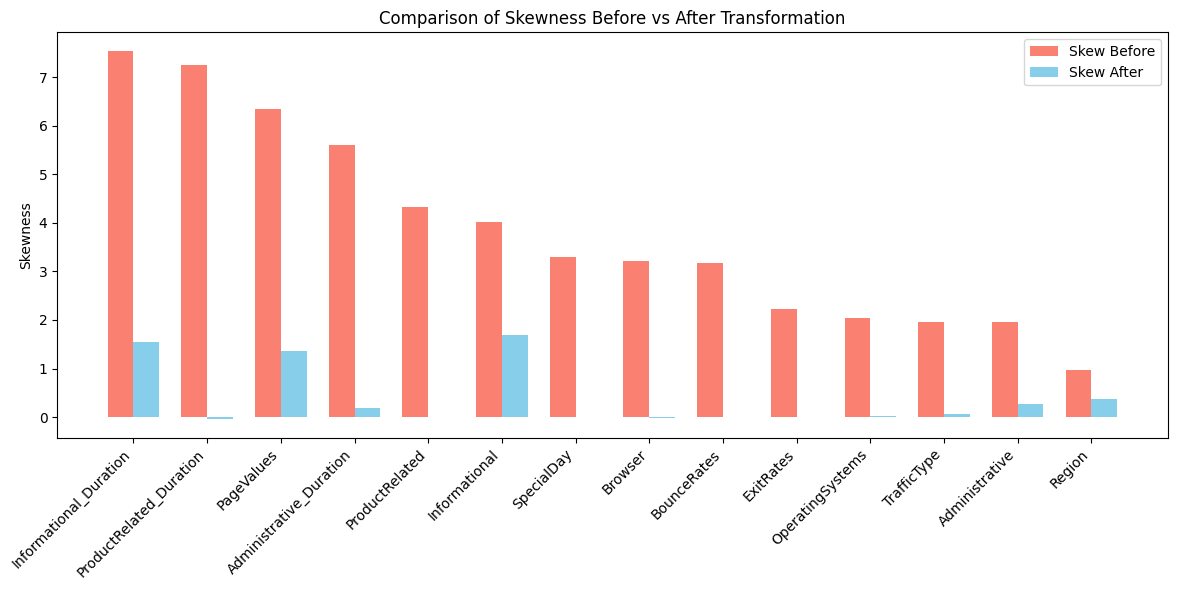

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plot for skewness comparison
plt.figure(figsize=(12,6))
skew_comparison.sort_values('Skew_Before', ascending=False, inplace=True)

bar_width = 0.35
indices = np.arange(len(skew_comparison))

# Bars for before and after
plt.bar(indices, skew_comparison['Skew_Before'], bar_width, label='Skew Before', color='salmon')
plt.bar(indices + bar_width, skew_comparison['Skew_After'], bar_width, label='Skew After', color='skyblue')

# Labels and titles
plt.xticks(indices + bar_width/2, skew_comparison.index, rotation=45, ha='right')
plt.ylabel('Skewness')
plt.title('Comparison of Skewness Before vs After Transformation')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


STEP 7- Categorical Encoding & Preprocessing

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Define target column
target = 'Revenue'

# Identify categorical columns
categorical_cols = df_outliers_handled.select_dtypes(include='object').columns.tolist()

# Separate features and target
X = df_outliers_handled.drop(target, axis=1)
y = df_outliers_handled[target]

# Split dataset (train-test) before scaling/encoding to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline: scale numerical, encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Fit and transform training data, transform test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Check shapes
print("--- Preprocessing Completed ---")
print("X_train shape:", X_train_processed.shape)
print("X_test shape:", X_test_processed.shape)


--- Preprocessing Completed ---
X_train shape: (9764, 27)
X_test shape: (2441, 27)


STEP 8-Check Imbalance

Class counts:
 Revenue
False    10297
True      1908
Name: count, dtype: int64

Class percentage:
 Revenue
False    84.367063
True     15.632937
Name: proportion, dtype: float64


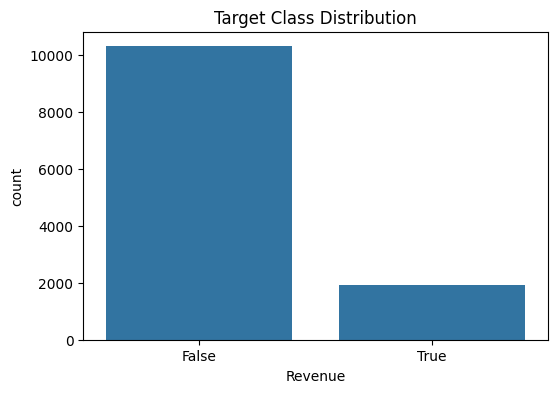

In [93]:
# Check target distribution
class_counts = y.value_counts()
class_percent = y.value_counts(normalize=True) * 100

print("Class counts:\n", class_counts)
print("\nClass percentage:\n", class_percent)

# Optional: visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Target Class Distribution')
plt.show()


1️⃣ Observation: Imbalance

Your target column is Revenue (binary classification):

False: 10,297 (~84.4%) → majority class

True: 1,908 (~15.6%) → minority class

STEP 8.1- Handle Imbalance with SMOTE (Training Set Only)

In [95]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

# Check new distribution
import pandas as pd
print("Class distribution after SMOTE on training data:")
print(pd.Series(y_train_res).value_counts())


Class distribution after SMOTE on training data:
Revenue
True     8238
False    8238
Name: count, dtype: int64


Now training dataset is perfectly balanced:

This ensures the model will learn equally from both classes and not be biased toward the majority class.

Dataset is ready for modeling.

MACHINE LEARNING MODEL TRAINING AND EVALUATION

STEP 1. IMPORT LIBRARIES FOR ML

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Step 2: Model Training and Evaluation

In [100]:
# Train Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Predict on original test set
y_pred = model.predict(X_test_processed)

# Evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8951249487914789

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.94      2059
        True       0.66      0.69      0.67       382

    accuracy                           0.90      2441
   macro avg       0.80      0.81      0.81      2441
weighted avg       0.90      0.90      0.90      2441


Confusion Matrix:
 [[1921  138]
 [ 118  264]]


True Negatives (TN): 1921 → correctly predicted False

False Positives (FP): 138 → incorrectly predicted True

False Negatives (FN): 118 → incorrectly predicted False

True Positives (TP): 264 → correctly predicted True

STEP 3- Feature Importance

STEP 3.1-Extract Feature Names After ColumnTransformer

In [98]:
# Get categorical feature names from OneHotEncoder
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine numerical + categorical feature names
feature_names = np.concatenate([numerical_cols, cat_features])


STEP 3.2- Get Feature Importances from Random Forest

/tmp/ipython-input-1966058468.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(20), palette='viridis')


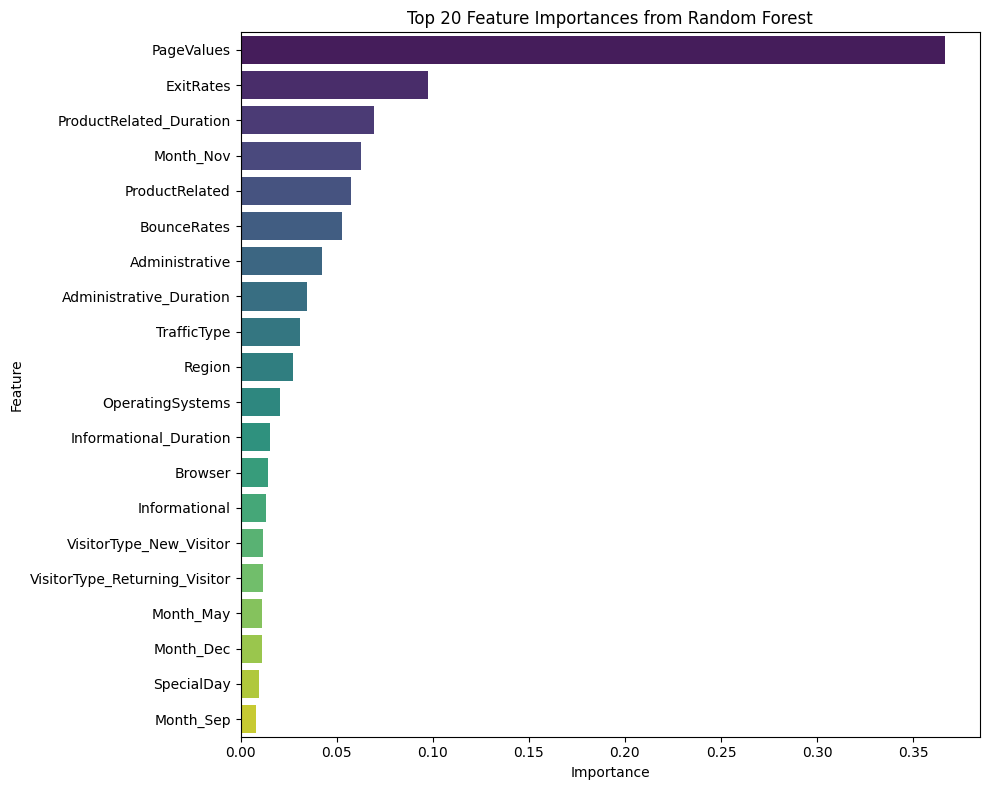

In [99]:
# Feature importances
importances = model.feature_importances_

# Create DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


 Top Predictive Features

These are the variables that contribute the most to predicting the target:

Predict_values — Highest importance
→ Indicates this feature has the strongest influence on the model’s decisions.

Exitrates

product_related_duration

STEP 4- BUILD AND TRAIN MULTIPLE MODELS

In [102]:
print("\n--- Step 4: Training Multiple Models ---")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Dictionary to store trained models
models = {}

# -----------------------------
# 1. Logistic Regression
# -----------------------------
print("Training Logistic Regression...")
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train_res, y_train_res)
models['Logistic Regression'] = lr_model

# -----------------------------
# 2. Random Forest
# -----------------------------
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)
models['Random Forest'] = rf_model

# -----------------------------
# 3. LightGBM
# -----------------------------
print("Training LightGBM...")
lgbm_model = LGBMClassifier(random_state=42, n_jobs=-1)
lgbm_model.fit(X_train_res, y_train_res)
models['LightGBM'] = lgbm_model

print("\n--- All Models Trained Successfully ---")





--- Step 4: Training Multiple Models ---
Training Logistic Regression...
Training Random Forest...
Training LightGBM...
[LightGBM] [Info] Number of positive: 8238, number of negative: 8238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6153
[LightGBM] [Info] Number of data points in the train set: 16476, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

--- All Models Trained Successfully ---


STEP 4.1 -FINAL SUMMARY TABLE

In [103]:
print("\n--- Model Evaluation on Test Set ---\n")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([model_name, accuracy, precision, recall, f1])

# Create comparison table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
results_df = results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

print("\n--- Model Comparison Table ---")
results_df



--- Model Evaluation on Test Set ---

Evaluating Logistic Regression...
Evaluating Random Forest...
Evaluating LightGBM...

--- Model Comparison Table ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.894306,0.651961,0.696335,0.673418
1,LightGBM,0.897173,0.671018,0.672775,0.671895
2,Logistic Regression,0.860713,0.535354,0.832461,0.651639


STEP 4.2- Visual Comparison of Models

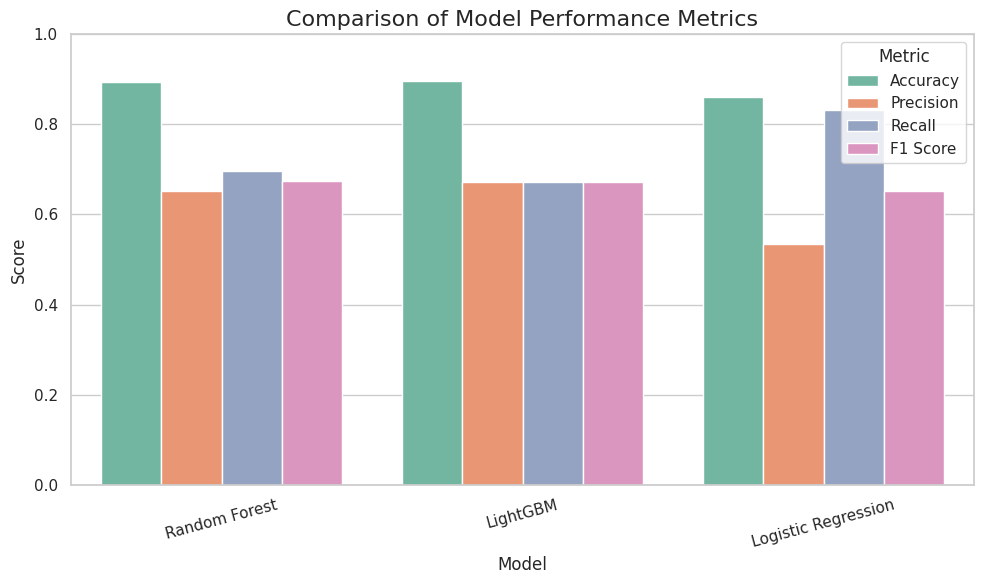

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# Melt the results_df for easy plotting
plot_df = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create grouped barplot
sns.barplot(x="Model", y="Score", hue="Metric", data=plot_df, palette="Set2")

# Add titles and labels
plt.title("Comparison of Model Performance Metrics", fontsize=16)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Insights

Ensemble models (Random Forest, LightGBM) perform better than a linear model (Logistic Regression) on this dataset.

LightGBM is slightly better overall, but Random Forest has slightly better recall — useful if capturing positive cases is critical.

Logistic Regression is simple but may underperform when relationships are nonlinear.

STEP 4.3-ROC-AUC Curve for All Models

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


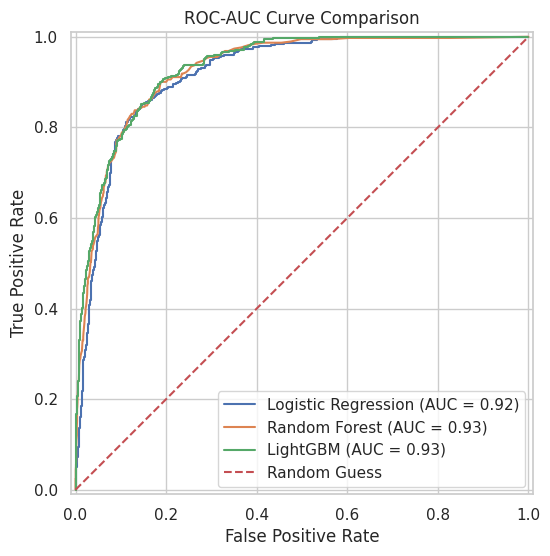


--- ROC-AUC evaluation complete. Plot saved as 'roc_auc_curve.png' ---


In [106]:
# --- ROC-AUC Curve for All Models ---
from sklearn.metrics import RocCurveDisplay  # <-- import added
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

for model_name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test_processed, y_test, name=model_name, ax=ax)

# Random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.title('ROC-AUC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('roc_auc_curve.png')
plt.show()

print("\n--- ROC-AUC evaluation complete. Plot saved as 'roc_auc_curve.png' ---")



In [119]:
predictions = lgbm_model.predict(X_test_df)
np.unique(predictions, return_counts=True)


(array([False,  True]), array([2058,  383]))

In [120]:
# Correct mapping: True -> 'Yes', False -> 'No'
df_potential_customers = pd.DataFrame({
    'Customer_Index': range(len(X_test_df)),
    'predicted_purchase': pd.Series(predictions).map({True: 'Yes', False: 'No'})
})


STEP 5-Final Insight: Predicted Customers


--- Generating Predicted Customers ---

     Customer_Index predicted_purchase
5                 5                Yes
14               14                Yes
21               21                Yes
30               30                Yes
33               33                Yes
34               34                Yes
47               47                Yes
64               64                Yes
74               74                Yes
77               77                Yes
78               78                Yes
79               79                Yes
82               82                Yes
83               83                Yes
86               86                Yes
90               90                Yes
99               99                Yes
111             111                Yes
112             112                Yes
117             117                Yes

Total predicted customers with purchase intention: 383 out of 2441 test customers.

Successfully saved predicted customers to 'predicted_cu

/tmp/ipython-input-1567631460.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # removes legend error


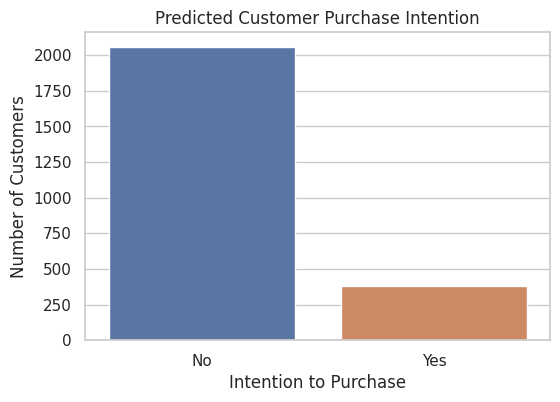

/tmp/ipython-input-1567631460.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='coolwarm')


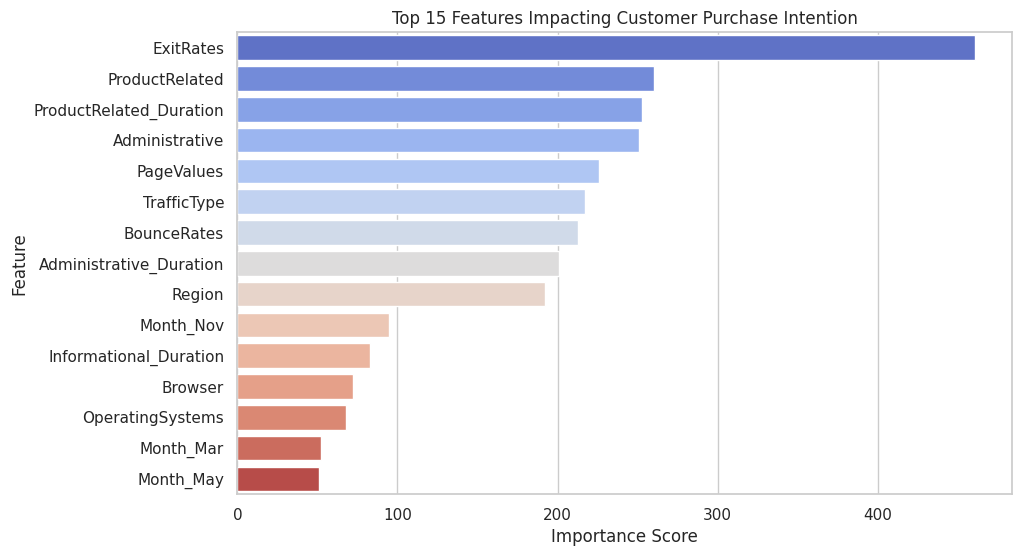

In [121]:
# ================================
# ✅ Final Insight: Predicted Customers
# ================================

try:
    print("\n--- Generating Predicted Customers ---\n")

    # 1️⃣ Transform the original X_test using the fitted preprocessor
    X_test_transformed = preprocessor.transform(X_test)

    # 2️⃣ Extract feature names from preprocessor
    cat_features_train = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_features_train = np.concatenate([numerical_cols, cat_features_train])

    # 3️⃣ Convert to DataFrame with proper feature names
    X_test_df = pd.DataFrame(X_test_transformed, columns=all_features_train)

    # 4️⃣ Ensure all training columns exist
    for col in all_features_train:
        if col not in X_test_df.columns:
            X_test_df[col] = 0

    # 5️⃣ Reorder columns exactly like training
    X_test_df = X_test_df[all_features_train]

    # 6️⃣ Predict using trained LightGBM model
    predictions = lgbm_model.predict(X_test_df)

    # 7️⃣ Map boolean predictions to "Yes"/"No"
    df_potential_customers = pd.DataFrame({
        'Customer_Index': range(len(X_test_df)),
        'predicted_purchase': pd.Series(predictions).map({True: 'Yes', False: 'No'})
    })

    # 8️⃣ Filter only predicted "Yes" customers
    df_potential_customers_yes = df_potential_customers[df_potential_customers['predicted_purchase'] == 'Yes']

    # 9️⃣ Display top 20 predicted customers
    print(df_potential_customers_yes.head(20))
    print(f"\nTotal predicted customers with purchase intention: {len(df_potential_customers_yes)} "
          f"out of {len(df_potential_customers)} test customers.")

    # 🔟 Save the final predicted list
    output_filename = 'predicted_customers.csv'
    df_potential_customers_yes.to_csv(output_filename, index=False)
    print(f"\nSuccessfully saved predicted customers to '{output_filename}'")

    # -------------------------------
    # Visualization & Reporting
    # -------------------------------

    # a) Distribution of predicted customers
    plt.figure(figsize=(6,4))
    sns.countplot(x='predicted_purchase', data=df_potential_customers, hue='predicted_purchase', dodge=False)
    plt.title("Predicted Customer Purchase Intention")
    plt.xlabel("Intention to Purchase")
    plt.ylabel("Number of Customers")
    plt.legend().remove()  # removes legend error
    plt.show()

    # b) Feature Importance Plot (Top 15 Features)
    importances = lgbm_model.feature_importances_
    feat_imp_df = pd.DataFrame({'Feature': all_features_train, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)

    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='coolwarm')
    plt.title("Top 15 Features Impacting Customer Purchase Intention")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

except NameError as e:
    print(f"\n!!! ERROR: {e} !!!")
    print("Please make sure the model and data preprocessing are completed first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


| Metric                    | Value |
| ------------------------- | ----- |
| Total Test Customers      | 2,441 |
| Predicted to Purchase     | 383   |
| Predicted Not to Purchase | 2,058 |
| Predicted Purchase %      | 15.7% |
